In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


# Задание 1

In [4]:
def Dichotomy_method(f, a, b, eps):
    k = 0
    result = [((a + b) / 2, k, a, b)]
    while (b - a >= 2 * eps):
        y = (a + b - eps) / 2
        z = (a + b + eps) / 2
        f_y = f(y)
        f_z = f(z)
        if (f_y <= f_z):
            a_next = a
            b_next = z
        else:
            a_next = y
            b_next = b
        k += 1
        result.append(((a_next + b_next) / 2, k, a_next, b_next))
        a, b = a_next, b_next

    return result


def Golden_section_search(f, a, b, eps):
    k = 0
    y = a + (3 - 5 ** 0.5) / 2 * (b - a)
    z = b - (3 - 5 ** 0.5) / 2 * (b - a)
    result = [((a + b) / 2, k, a, b)]
    while (b - a >= eps):
        f_y = f(y)
        f_z = f(z)
        if (f_y <= f_z):
            a_next = a
            b_next = z
            y_next = a + (3 - 5 ** 0.5) / 2 * (z - a)
            z_next = y
        else:
            a_next = y
            b_next = b
            y_next = z
            z_next = b - (3 - 5 ** 0.5) / 2 * (b - y)
        k += 1
        result.append(((a_next + b_next) / 2, k, a_next, b_next))
        a, b, y, z = a_next, b_next, y_next, z_next

    return result


def Result(f, a, b, eps):
    d = Dichotomy_method(f, a, b, eps)
    g = Golden_section_search(f, a, b, eps)
    return np.array(d), np.array(g)


In [30]:
f = lambda x: x - x ** 3 / 6 + x ** 5 / 120
a = -3
b = 1
eps = 0.001
d, g = Result(f, a, b, eps)
x = np.linspace(a, b, 5000)
y = f(x)

print("f(x) = x - x ** 3 / 6 + x ** 5 / 120")
print("a =", a)
print("b =", b)
print("eps =", eps)
print()

print("Метод дихотомии: x = ", d[-1][0], ', ', int(d[-1][1]), ' итераций', sep='')
print("Метод золотого сечения: x = ", g[-1][0], ', ', int(g[-1][1]), ' итераций', sep='')


f(x) = x - x ** 3 / 6 + x ** 5 / 120
a = -3
b = 1
eps = 0.001

Метод дихотомии: x = -1.592137084960938, 12 итераций
Метод золотого сечения: x = -1.5923897842315509, 18 итераций


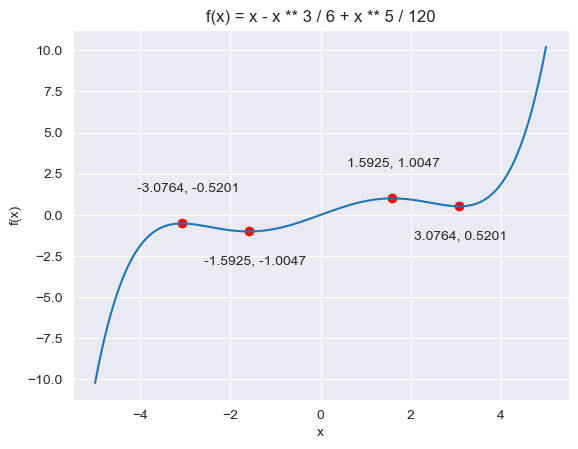

In [31]:
x = np.linspace(-5, 5, 5000)
y = f(x)

x1 = -np.sqrt(6 + 2 * np.sqrt(3))  #-3.076378002641703
x2 = -np.sqrt(6 - 2 * np.sqrt(3))  #-1.5924504340362515
x3 = np.sqrt(6 - 2 * np.sqrt(3))  #1.5924504340362515
x4 = np.sqrt(6 + 2 * np.sqrt(3))  #3.076378002641703plt.scatter([x1, x2, x3, x4], [f(x1), f(x2), f(x3), f(x4)], c='r')

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title("f(x) = x - x ** 3 / 6 + x ** 5 / 120")
plt.scatter((x1, x2, x3, x4), (f(x1), f(x2), f(x3), f(x4)), c='r')
plt.text(x1 - 1, f(x1) + 2, f'{round(x1, 4)}, {round(f(x1), 4)}')
plt.text(x2 - 1, f(x2) - 2, f'{round(x2, 4)}, {round(f(x2), 4)}')
plt.text(x3 - 1, f(x3) + 2, f'{round(x3, 4)}, {round(f(x3), 4)}')
plt.text(x4 - 1, f(x4) - 2, f'{round(x4, 4)}, {round(f(x4), 4)}')
plt.show()


f(x) = x - x ** 3 / 6 + x ** 5 / 120
a = -3
b = 1
eps = 0.001

Метод дихотомии: x = -1.592137084960938, 12 итераций
Метод золотого сечения: x = -1.5923897842315509, 18 итераций


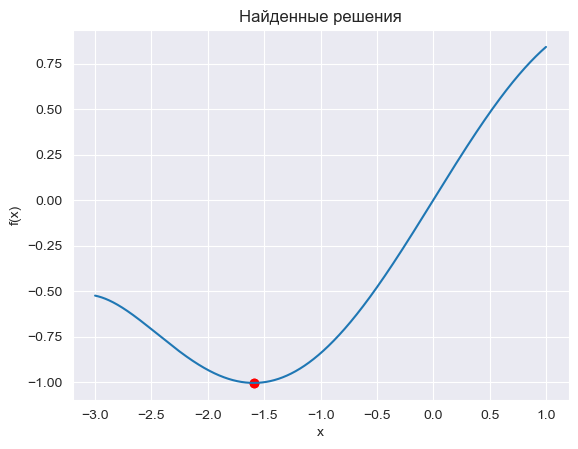

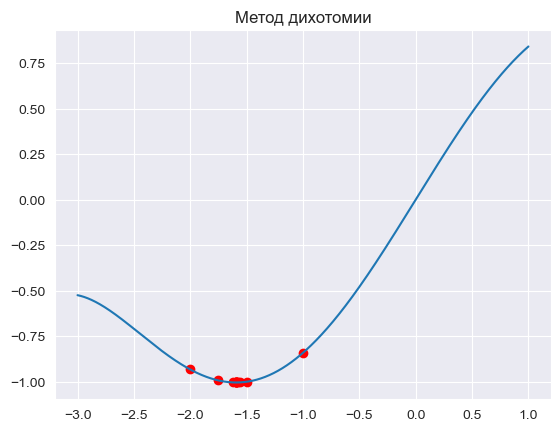

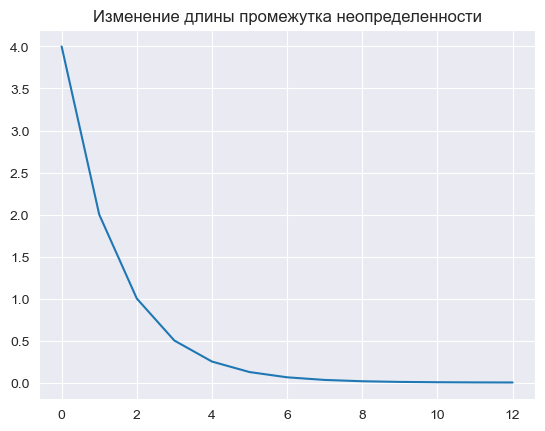

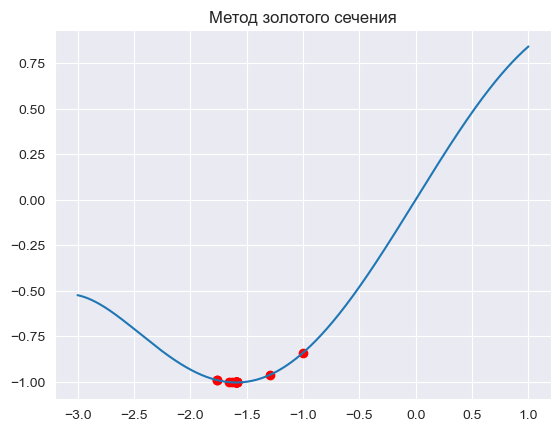

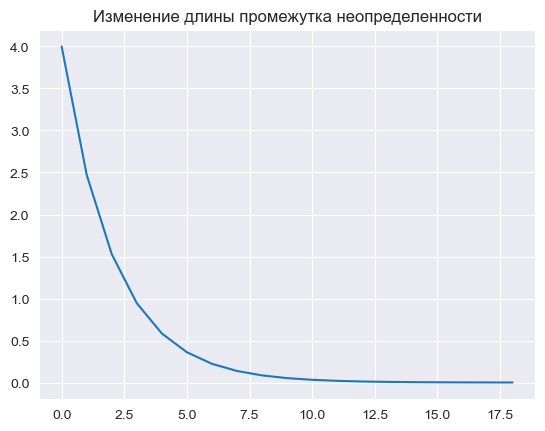

In [33]:
f = lambda x: x - x ** 3 / 6 + x ** 5 / 120
a = -3
b = 1
eps = 0.001
d, g = Result(f, a, b, eps)
x = np.linspace(a, b, 5000)
y = f(x)

print("f(x) = x - x ** 3 / 6 + x ** 5 / 120")
print("a =", a)
print("b =", b)
print("eps =", eps)
print()

print("Метод дихотомии: x = ", d[-1][0], ', ', int(d[-1][1]), ' итераций', sep='')
print("Метод золотого сечения: x = ", g[-1][0], ', ', int(g[-1][1]), ' итераций', sep='')

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Найденные решения')
plt.scatter([d[-1][0], g[-1][0]], [f(d[-1][0]), f(g[-1][0])], c='r')
plt.show()

plt.plot(x, y)
plt.title('Метод дихотомии')
plt.scatter(d[:, 0], f(d[:, 0]), c='r')
plt.show()

d_diff = d[:, 3] - d[:, 2]
plt.plot(d[:, 1], d_diff)
plt.title('Изменение длины промежутка неопределенности')
plt.show()

plt.plot(x, y)
plt.title('Метод золотого сечения')
plt.scatter(g[:, 0], f(g[:, 0]), c='r')
plt.show()

g_diff = g[:, 3] - g[:, 2]
plt.plot(g[:, 1], g_diff)
plt.title('Изменение длины промежутка неопределенности')
plt.show()


f(x) = x - x ** 3 / 6 + x ** 5 / 120
a = 1.6
b = 4
eps = 0.001

Метод дихотомии: x = 3.0761544189453125, 12 итераций
Метод золотого сечения: x = 3.076579493914003, 17 итераций


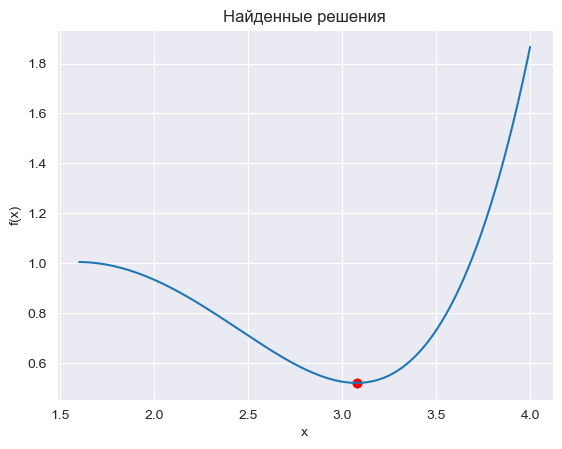

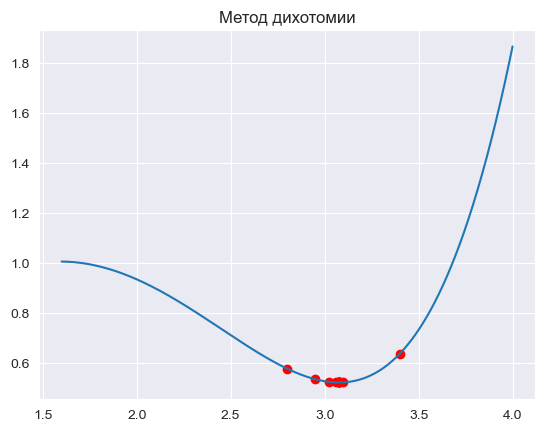

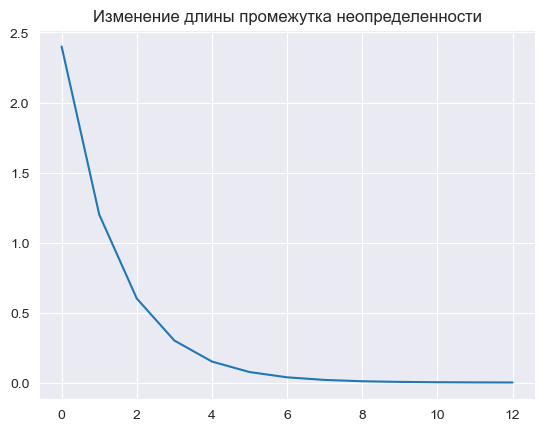

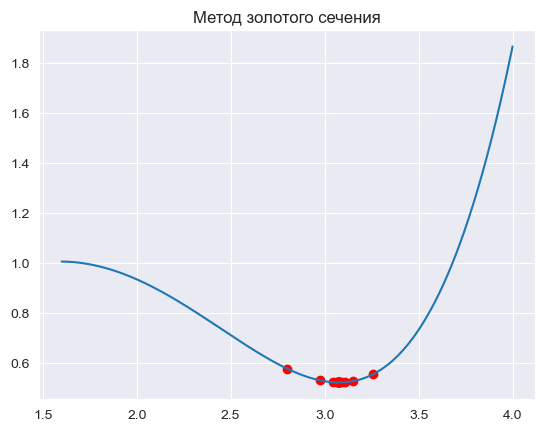

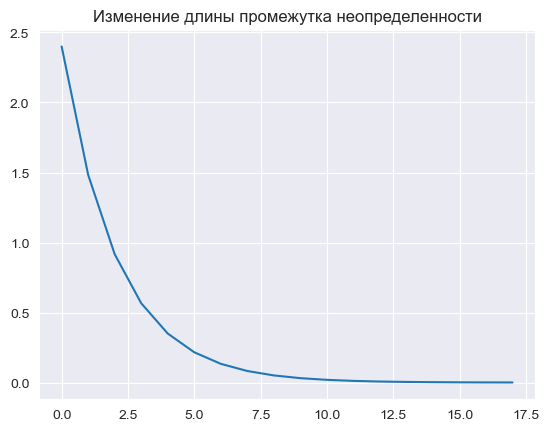

In [34]:
f = lambda x: x - x ** 3 / 6 + x ** 5 / 120
a = 1.6
b = 4
eps = 0.001
d, g = Result(f, a, b, eps)
x = np.linspace(a, b, 5000)
y = f(x)

print("f(x) = x - x ** 3 / 6 + x ** 5 / 120")
print("a =", a)
print("b =", b)
print("eps =", eps)
print()

print("Метод дихотомии: x = ", d[-1][0], ', ', int(d[-1][1]), ' итераций', sep='')
print("Метод золотого сечения: x = ", g[-1][0], ', ', int(g[-1][1]), ' итераций', sep='')

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Найденные решения')
plt.scatter([d[-1][0], g[-1][0]], [f(d[-1][0]), f(g[-1][0])], c='r')
plt.show()

plt.plot(x, y)
plt.title('Метод дихотомии')
plt.scatter(d[:, 0], f(d[:, 0]), c='r')
plt.show()

d_diff = d[:, 3] - d[:, 2]
plt.plot(d[:, 1], d_diff)
plt.title('Изменение длины промежутка неопределенности')
plt.show()

plt.plot(x, y)
plt.title('Метод золотого сечения')
plt.scatter(g[:, 0], f(g[:, 0]), c='r')
plt.show()

g_diff = g[:, 3] - g[:, 2]
plt.plot(g[:, 1], g_diff)
plt.title('Изменение длины промежутка неопределенности')
plt.show()


f(x) = x - x ** 3 / 6 + x ** 5 / 120
a = 6
b = 10
eps = 0.001

Метод дихотомии: x = 6.000988159179688, 12 итераций
Метод золотого сечения: x = 6.000346140543424, 18 итераций


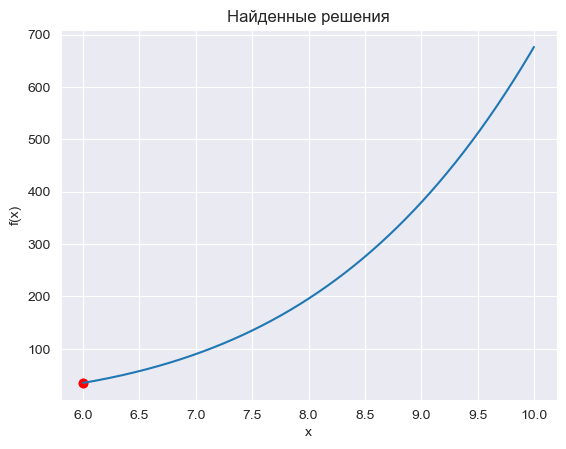

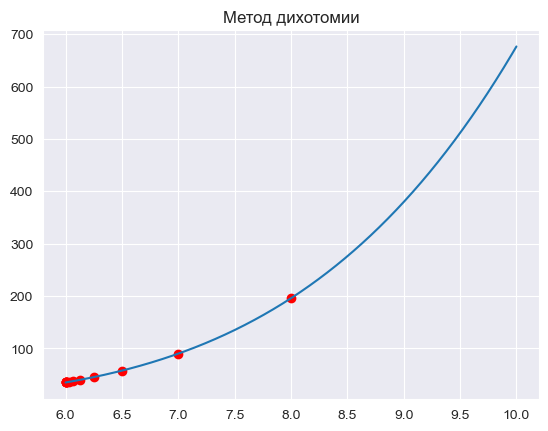

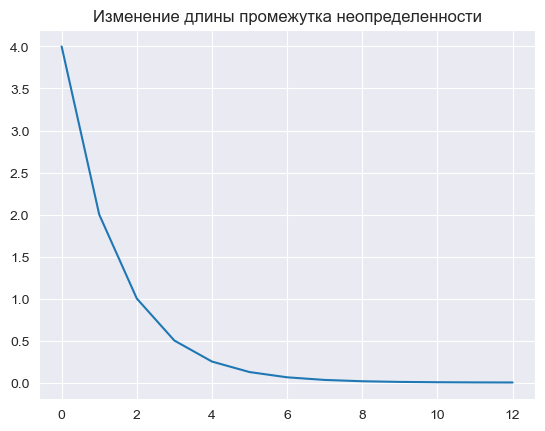

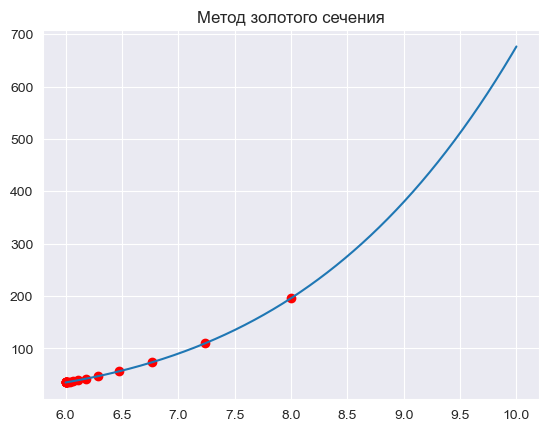

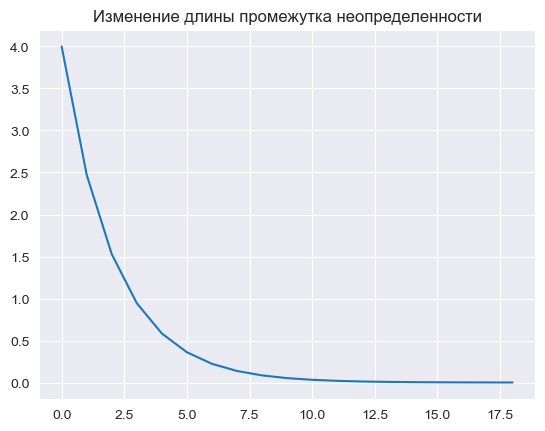

In [35]:
f = lambda x: x - x ** 3 / 6 + x ** 5 / 120
a = 6
b = 10
eps = 0.001
d, g = Result(f, a, b, eps)
x = np.linspace(a, b, 5000)
y = f(x)

print("f(x) = x - x ** 3 / 6 + x ** 5 / 120")
print("a =", a)
print("b =", b)
print("eps =", eps)
print()

print("Метод дихотомии: x = ", d[-1][0], ', ', int(d[-1][1]), ' итераций', sep='')
print("Метод золотого сечения: x = ", g[-1][0], ', ', int(g[-1][1]), ' итераций', sep='')

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Найденные решения')
plt.scatter([d[-1][0], g[-1][0]], [f(d[-1][0]), f(g[-1][0])], c='r')
plt.show()

plt.plot(x, y)
plt.title('Метод дихотомии')
plt.scatter(d[:, 0], f(d[:, 0]), c='r')
plt.show()

d_diff = d[:, 3] - d[:, 2]
plt.plot(d[:, 1], d_diff)
plt.title('Изменение длины промежутка неопределенности')
plt.show()

plt.plot(x, y)
plt.title('Метод золотого сечения')
plt.scatter(g[:, 0], f(g[:, 0]), c='r')
plt.show()

g_diff = g[:, 3] - g[:, 2]
plt.plot(g[:, 1], g_diff)
plt.title('Изменение длины промежутка неопределенности')
plt.show()


f(x) = x - x ** 3 / 6 + x ** 5 / 120
a = -3
b = 6
eps = 0.001

Метод дихотомии: x = -1.5925823669433594, 14 итераций
Метод золотого сечения: x = -1.5925034119870962, 19 итераций


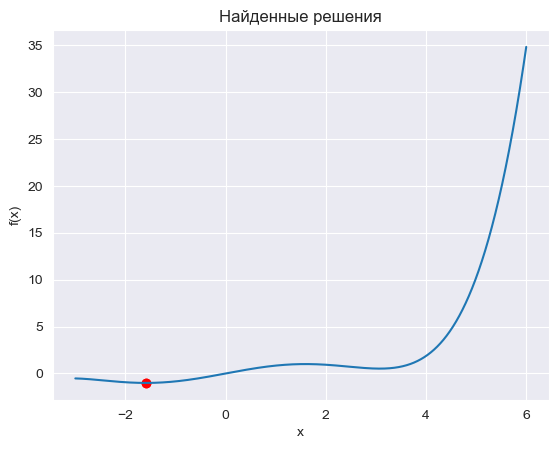

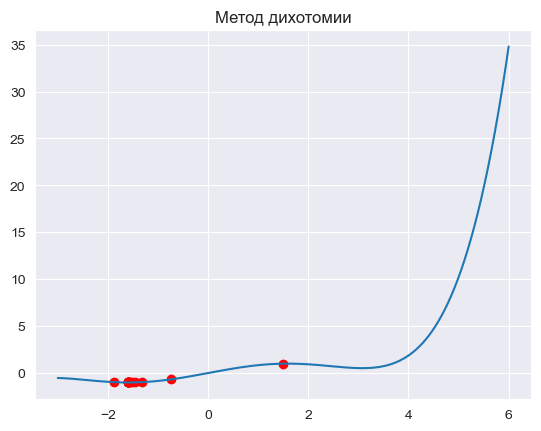

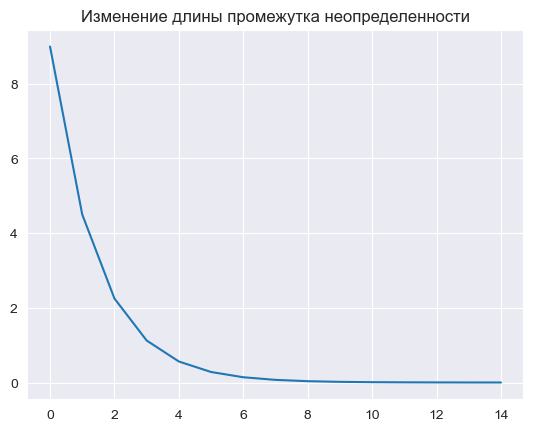

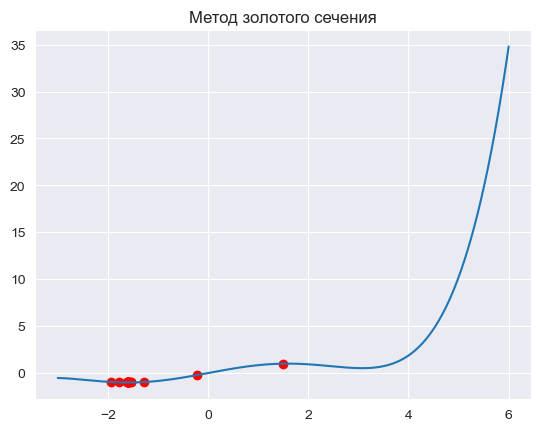

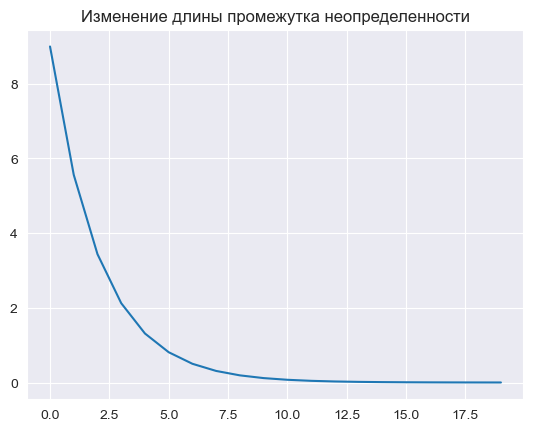

In [36]:
f = lambda x: x - x ** 3 / 6 + x ** 5 / 120
a = -3
b = 6
eps = 0.001
d, g = Result(f, a, b, eps)
x = np.linspace(a, b, 5000)
y = f(x)

print("f(x) = x - x ** 3 / 6 + x ** 5 / 120")
print("a =", a)
print("b =", b)
print("eps =", eps)
print()

print("Метод дихотомии: x = ", d[-1][0], ', ', int(d[-1][1]), ' итераций', sep='')
print("Метод золотого сечения: x = ", g[-1][0], ', ', int(g[-1][1]), ' итераций', sep='')

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Найденные решения')
plt.scatter([d[-1][0], g[-1][0]], [f(d[-1][0]), f(g[-1][0])], c='r')
plt.show()

plt.plot(x, y)
plt.title('Метод дихотомии')
plt.scatter(d[:, 0], f(d[:, 0]), c='r')
plt.show()

d_diff = d[:, 3] - d[:, 2]
plt.plot(d[:, 1], d_diff)
plt.title('Изменение длины промежутка неопределенности')
plt.show()

plt.plot(x, y)
plt.title('Метод золотого сечения')
plt.scatter(g[:, 0], f(g[:, 0]), c='r')
plt.show()

g_diff = g[:, 3] - g[:, 2]
plt.plot(g[:, 1], g_diff)
plt.title('Изменение длины промежутка неопределенности')
plt.show()
